In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib inline

### Homework 2.2 - Heat Transfer

Use the finite differential method to solve a heat transfer equation, given by

$$ \frac{{\partial T}}{{\partial t}} = k\frac{{{\partial ^2}T}}{{\partial {x^2}}} $$

where $T(t, x)$ is the temperature distribution function.

Solve the equation for $x$ between 0 and 1. At $x=0$ the temperature varies as $T(t,0)=sin(10t)$ and at At $x=1$ the temperature varies as $T(t,0)=e^{ - 100 (t - 0.15)^2}$.

Make the animated clip of the temperature distribution function evolution. Pick appropriate time range.

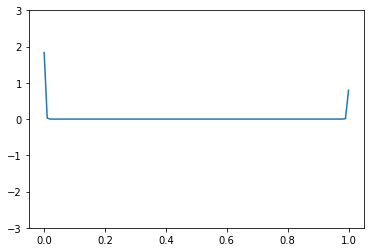

In [7]:
# Set up an array of ux0
N = 100
L = 1
x = np.linspace(0, L, num=N+1, endpoint=True)
Ux0 = np.zeros_like(x)

# ensuring both ends are fixed at zero
Ux0[0] = 0
Ux0[N] = 0

Uold = Ux0
# Set up initial condition for the time derivative at t = 0
dUx0 = np.zeros(N+1)

dt = 0.001 # Set up time step size
dh = L / N # Spatial step size
c = 0.1
eps = ((dt*c/dh)**2)
omega = 10

# Calculate time step j = 1
Uxj = np.zeros(N+1)
for i in np.linspace(1, 99, 99, dtype=int):
    Uxj[i] = 0.5*eps*(Ux0[i+1] + Ux0[i-1]) + (1. - eps)*(Ux0[i]) + dt * dUx0[i]
Uxj[0] = 2*np.sin(omega*1*dt)
Uxj[-1] = np.exp(-100*(1*dt-0.15)**2)

UAll = np.array([Uxj])
fig1 = plt.figure()
l = plt.plot(x, Uxj)
axes = plt.gca()
axes.set_ylim([-3,3])

for j in range(200):
    Unew = np.zeros(101)
    for i in np.linspace(1, 99, 99, dtype=int):
        Unew[i] = eps*(Uxj[i+1] - 2*Uxj[i] + Uxj[i-1]) + Uxj[i]
    Unew[0] = 2*np.sin(omega*j*dt)
    Unew[-1] = np.exp(-100*(j*dt-0.15)**2)
    Uold = Uxj
    Uxj = Unew
    UAll = np.vstack([UAll, Unew])


def update_line(num, line):
    line.set_data(x, UAll[num])
    return line,
        
line_ani = animation.FuncAnimation(fig1, update_line, 200, fargs=(l), interval=20, blit=True)
writergif = animation.PillowWriter(fps=45)
line_ani.save("hw22.gif",writer=writergif)
plt.show()

<img src="hw22.gif">